In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

C:\Users\Shivam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load datasets
unemp_df = pd.read_csv("Bureau_of_Labor_Statistics_Monthly_Unemployment__current_14_months_.csv")
cvi_df = pd.read_csv("Chmura_CVI_Counties_April_2020.csv")
glob_mob = pd.read_csv("Global_Mobility_Report.csv")  

C:\Users\Shivam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#check umemployment data
unemp_df.head()

,FID,COUNTYNS,GEOID,ALAND,AWATER,NAME,State,fips,LaborForce_CurrentMonth,LaborForce_01Month,...,P06Month,P07Month,P08Month,P09Month,P10Month,P11Month,P12Month,P13Month,SHAPE_Length,SHAPE_Area
0,1,161526,1001,1539602137,25706961,Autauga County,Alabama,1001,25557.0,25906,...,September 2019,August 2019,July 2019,June 2019,May 2019,April 2019,March 2019,February 2019,2.066037,0.150256
1,2,161527,1003,4117621645,1132980868,Baldwin County,Alabama,1003,95672.0,95924,...,September 2019,August 2019,July 2019,June 2019,May 2019,April 2019,March 2019,February 2019,4.483746,0.409904
2,3,161528,1005,2292160139,50523213,Barbour County,Alabama,1005,8434.0,8532,...,September 2019,August 2019,July 2019,June 2019,May 2019,April 2019,March 2019,February 2019,2.695262,0.223270
3,4,161529,1007,1612167476,9602089,Bibb County,Alabama,1007,8524.0,8628,...,September 2019,August 2019,July 2019,June 2019,May 2019,April 2019,March 2019,February 2019,1.887514,0.156473
4,5,161530,1009,1670103866,15015467,Blount County,Alabama,1009,24820.0,25179,...,September 2019,August 2019,July 2019,June 2019,May 2019,April 2019,March 2019,February 2019,2.423552,0.164405


In [4]:
pd.options.display.max_rows = 80


#check for the missing data
unemp_df.isna().sum()

FID                            0
COUNTYNS                       0
GEOID                          0
ALAND                          0
AWATER                         0
NAME                           0
State                          0
fips                           0
LaborForce_CurrentMonth       78
LaborForce_01Month             0
LaborForce_02Month             0
LaborForce_03Month             0
LaborForce_04Month             0
LaborForce_05Month             0
LaborForce_06Month             0
LaborForce_07Month             0
LaborForce_08Month             0
LaborForce_09Month             0
LaborForce_10Month             0
LaborForce_11Month             0
LaborForce_12Month             0
LaborForce_13Month             0
Employed_CurrentMonth         78
Employed_01Month               0
Employed_02Month               0
Employed_03Month               0
Employed_04Month               0
Employed_05Month               0
Employed_06Month               0
Employed_07Month               0
Employed_0

In [5]:
#drop the columns 
unemp_df.dropna(axis=1,inplace=True)

In [6]:
#check for the duplicates
unemp_df.duplicated().sum()

0

In [7]:
unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FID                    3219 non-null   int64  
 1   COUNTYNS               3219 non-null   int64  
 2   GEOID                  3219 non-null   int64  
 3   ALAND                  3219 non-null   int64  
 4   AWATER                 3219 non-null   int64  
 5   NAME                   3219 non-null   object 
 6   State                  3219 non-null   object 
 7   fips                   3219 non-null   int64  
 8   LaborForce_01Month     3219 non-null   int64  
 9   LaborForce_02Month     3219 non-null   int64  
 10  LaborForce_03Month     3219 non-null   int64  
 11  LaborForce_04Month     3219 non-null   int64  
 12  LaborForce_05Month     3219 non-null   int64  
 13  LaborForce_06Month     3219 non-null   int64  
 14  LaborForce_07Month     3219 non-null   int64  
 15  Labo

In [8]:
unemp_df_1 = unemp_df.iloc[:,[3,4,5,6,7,8,9,21,34,47,60]]

In [9]:
#check cvi data
cvi_df.head()

,f2,f3,f4,f5,objectId,EXCEL_ID,FIPS
0,Lee County,Alabama,119.27,263,2,5062f63e-56f7-4fad-8c2c-59a5511a4a64,1081
1,Limestone County,Alabama,86.90,1504,3,3a26d5ec-95fd-44d8-bd09-a0fa78c67ae4,1083
2,Lowndes County,Alabama,62.09,2672,4,a3f9056b-9636-42cb-8fa2-898110a184ac,1085
3,Macon County,Alabama,77.36,2029,5,9faf7c64-738c-4f8a-995c-4f371fedb1ac,1087
4,Madison County,Alabama,92.55,1191,6,def16b20-a759-4b14-acc1-4260073e04b0,1089


In [10]:
#change the col names of cvi data
cvi_colnames = ['county_cvi','state_cvi','vulnerability_index','rank_cvi','objected_cvi','excel_id_cvi','fips_cvi']

cvi_df.columns = cvi_colnames

In [11]:
#test the column names
cvi_df.head(1)

,county_cvi,state_cvi,vulnerability_index,rank_cvi,objected_cvi,excel_id_cvi,fips_cvi
0,Lee County,Alabama,119.27,263,2,5062f63e-56f7-4fad-8c2c-59a5511a4a64,1081


In [12]:
#check for missing data
cvi_df.isna().sum()

county_cvi             0
state_cvi              0
vulnerability_index    0
rank_cvi               0
objected_cvi           0
excel_id_cvi           0
fips_cvi               0
dtype: int64

In [13]:
#check for duplicates
cvi_df.duplicated().sum()

0

In [14]:
#check info
cvi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   county_cvi           3141 non-null   object 
 1   state_cvi            3141 non-null   object 
 2   vulnerability_index  3141 non-null   float64
 3   rank_cvi             3141 non-null   int64  
 4   objected_cvi         3141 non-null   int64  
 5   excel_id_cvi         3141 non-null   object 
 6   fips_cvi             3141 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 171.9+ KB


In [15]:
## Combine both the data

In [16]:
#merge on county ans state
df = pd.merge(unemp_df_1,cvi_df,left_on=['NAME','State'],right_on=['county_cvi','state_cvi'])

In [17]:
df.head(1)

,ALAND,AWATER,NAME,State,fips,LaborForce_01Month,LaborForce_02Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,county_cvi,state_cvi,vulnerability_index,rank_cvi,objected_cvi,excel_id_cvi,fips_cvi
0,1539602137,25706961,Autauga County,Alabama,1001,25906,25912,25196,710,2.7,March 2020 - Preliminary,Autauga County,Alabama,110.31,401,100,35fc8203-5876-41dc-9977-6cea758857da,1001


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3089
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ALAND                  3090 non-null   int64  
 1   AWATER                 3090 non-null   int64  
 2   NAME                   3090 non-null   object 
 3   State                  3090 non-null   object 
 4   fips                   3090 non-null   int64  
 5   LaborForce_01Month     3090 non-null   int64  
 6   LaborForce_02Month     3090 non-null   int64  
 7   Employed_01Month       3090 non-null   int64  
 8   Unemployed_01Month     3090 non-null   int64  
 9   PctUnemployed_01Month  3090 non-null   float64
 10  CurrentMonth           3090 non-null   object 
 11  county_cvi             3090 non-null   object 
 12  state_cvi              3090 non-null   object 
 13  vulnerability_index    3090 non-null   float64
 14  rank_cvi               3090 non-null   int64  
 15  obje

ALand: Area of Land
AWater: Area of Water
NAME: name of county
State: name of state
fips: FIPS code
LAbourForce_01Month:  Count of people within the US Labor Force - most current month
Employed_01Month : Count of Employed Population - most current month
Unemployement_01Month : Count of Unemployed Population - most current month
PctUnemployement_01Month : Percent Unemployed - most current month
CurrentMonth :  Month and year - most current month offered by BLS
county_cvi: county name
state_name: state name
vulnerability_index : 
rank_cvi : rank of vulnerability from covid
objected_cvi: index(we can drop this)
excel_ID: ed (we can drop this)
FIPS: FIPS code

In [19]:
#Check if the merge is successful. Result should be 0
df.query('county_cvi != NAME ')

,ALAND,AWATER,NAME,State,fips,LaborForce_01Month,LaborForce_02Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,county_cvi,state_cvi,vulnerability_index,rank_cvi,objected_cvi,excel_id_cvi,fips_cvi


In [20]:
df.drop(columns=['fips','LaborForce_02Month','county_cvi','state_cvi','objected_cvi','excel_id_cvi'],axis=1,inplace=True)

In [21]:
#save the merged file
df.to_csv("cvi_unemployment_2020.csv",index=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3089
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ALAND                  3090 non-null   int64  
 1   AWATER                 3090 non-null   int64  
 2   NAME                   3090 non-null   object 
 3   State                  3090 non-null   object 
 4   LaborForce_01Month     3090 non-null   int64  
 5   Employed_01Month       3090 non-null   int64  
 6   Unemployed_01Month     3090 non-null   int64  
 7   PctUnemployed_01Month  3090 non-null   float64
 8   CurrentMonth           3090 non-null   object 
 9   vulnerability_index    3090 non-null   float64
 10  rank_cvi               3090 non-null   int64  
 11  fips_cvi               3090 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 313.8+ KB


In [23]:
#find the county with maximum land area
df[df.ALAND == max(df.ALAND)]

,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
94,377038836685,5945279912,Yukon-Koyukuk Census Area,Alaska,2394,2054,340,14.2,March 2020 - Preliminary,44.05,3056,2290


In [24]:
#find the county with maximum land area
df[df.AWATER == max(df.AWATER)]

,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
82,61912947833,25973300388,Lake and Peninsula Borough,Alaska,585,519,66,11.3,March 2020 - Preliminary,121.35,225,2164


In [25]:
#counties with highest labour force
index_top10 = list(df.LaborForce_01Month.sort_values(ascending=False).index[:5])


df.iloc[index_top10]


,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
203,10511861492,1793485467,Los Angeles County,California,5222823,4984604,238219,4.6,March 2020,122.14,221,6037
605,2447357982,1786325586,Cook County,Illinois,2564954,2476865,88089,3.4,March 2020 - Preliminary,108.14,458,17031
102,23829622328,63347750,Maricopa County,Arizona,2373098,2283286,89812,3.8,March 2020 - Preliminary,103.54,617,4013
2610,4418909573,184757689,Harris County,Texas,2361581,2269910,91671,3.9,March 2020 - Preliminary,98.63,857,48201
214,2053367783,401931862,Orange County,California,1623913,1578370,45543,2.8,March 2020 - Preliminary,110.95,389,6059


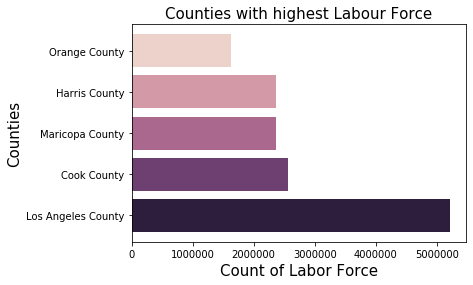

In [86]:
top5_lab = df.iloc[index_top10]
h = list(top5_lab.LaborForce_01Month)
l = [1,2,3,4,5]
tl = list(top5_lab.NAME.values)
b_col = sns.cubehelix_palette(5,reverse=True)
plt.barh(l,h,color=b_col);#,tick_lable=tl)
plt.yticks(l,tl);
plt.xlabel('Count of Labor Force',size=15);
plt.ylabel("Counties",size=15);
plt.title("Counties with highest Labour Force",size=15);

In [80]:
#counties with highest unemployment rate 
index_top10_u = list(df.PctUnemployed_01Month.sort_values(ascending=False).index[:5])


df.iloc[index_top10_u]


,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
89,1123881121,28784118,Skagway Municipality,Alaska,591,466,125,21.2,March 2020 - Preliminary,226.22,12,2230
190,2980332742,14608887,Colusa County,California,11204,8986,2218,19.8,March 2020 - Preliminary,81.62,1800,6011
2947,723252961,3704011,Calhoun County,West Virginia,2756,2215,541,19.6,March 2020 - Preliminary,49.10,2994,54013
81,44222017663,6693558019,Kusilvak Census Area,Alaska,2681,2165,516,19.2,March 2020 - Preliminary,43.00,3066,2158
72,32729577049,66105677,Denali Borough,Alaska,561,459,102,18.2,March 2020 - Preliminary,275.00,3,2068


### Denali Borough county in Alaska seems to have higest unemployment rate in counties with highest CVI

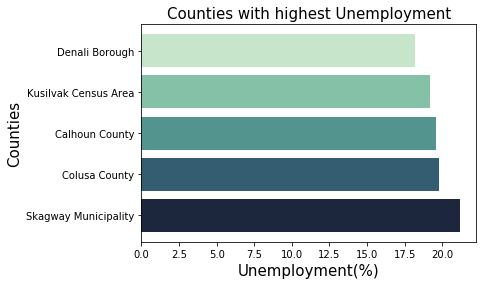

In [88]:
top5_unm = df.iloc[index_top10_u]

h = list(top5_unm.PctUnemployed_01Month)
l = [1,2,3,4,5]
tl = list(top5_unm.NAME.values)
b_col = sns.cubehelix_palette(5,reverse=True,rot=-.4)
plt.barh(l,h,color=b_col);#,tick_lable=tl)
plt.yticks(l,tl);
plt.xlabel('Unemployment(%)',size=15);
plt.ylabel("Counties",size=15);
plt.title("Counties with highest Unemployment",size=15);

In [89]:
#counties with highest vulnerability index
index_top10_v = list(df.vulnerability_index.sort_values(ascending=False).index[:5])


df.iloc[index_top10_v]

,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
267,388556733,942056,Gilpin County,Colorado,3874,3789,85,2.2,March 2020 - Preliminary,348.83,1,8047
2161,1331024899,47506501,Love County,Oklahoma,6167,6032,135,2.2,March 2020 - Preliminary,309.31,2,40085
72,32729577049,66105677,Denali Borough,Alaska,561,459,102,18.2,March 2020 - Preliminary,275.00,3,2068
283,2268209075,5222161,Mineral County,Colorado,534,519,15,2.8,March 2020 - Preliminary,257.30,4,8079
1964,1366810463,32416167,Swain County,North Carolina,6729,6407,322,4.8,March 2020 - Preliminary,250.90,5,37173


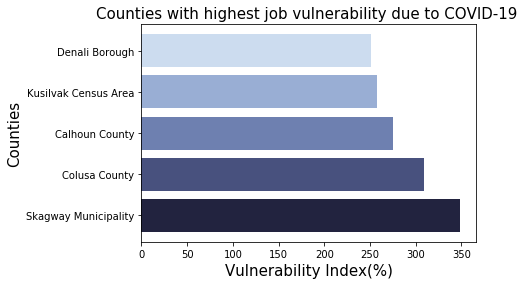

In [95]:
top5_cvi = df.iloc[index_top10_v]

h = list(top5_cvi.vulnerability_index)
l = [1,2,3,4,5]
tl = list(top5_unm.NAME.values)
b_col = sns.cubehelix_palette(5,reverse=True,rot=-.1)
plt.barh(l,h,color=b_col);#,tick_lable=tl)
plt.yticks(l,tl);
plt.xlabel('Vulnerability Index(%)',size=15);
plt.ylabel("Counties",size=15);
plt.title("Counties with highest job vulnerability due to COVID-19 ",size=15);

#### An average Vulnerability Index score is 100, representing the average job loss expected in the United States. Higher scores indicate the degree to which job losses may be greater — an index score of 200, for example, means the rate of job loss can be twice as large as the national average. Conversely, an index score of 50 would mean a possible job loss of half the national average. Regions heavily dependent on tourism with relatively high concentrations of leisure and hospitality jobs, for example, are likely to have high index scores. 

#### The Vulnerability Index only measures the impact potential related to the mix of industry employment. The index does not take into account variation due to a region’s rate of virus infection, nor does it factor in local government's policies in reaction to the virus.

In [ ]:
df.corr()

In [ ]:
glob_mob.tail()

us_mob = glob_mob.query('country_region_code == "US"')
us_mob.head()